# Covid Fake news detection (Sprint3 - version1)

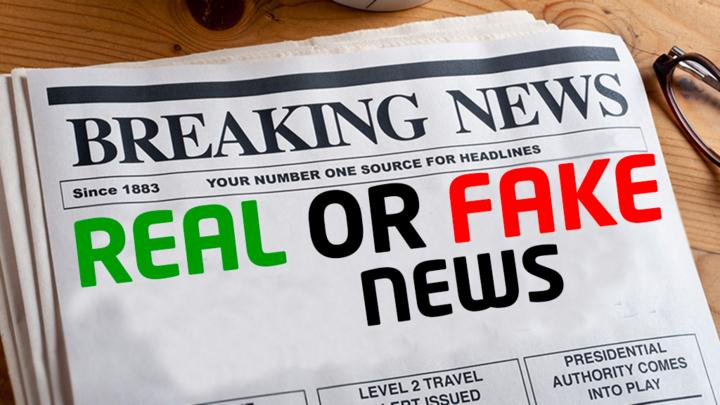

## Import the Dependencies

In [608]:
# pip install scipy
# nltk.download("stopwords")
# pip install matplotlib
# pip install wordcloud
# pip install seaborn
# pip install textblob
# Download required resources
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# pip install tldextract

In [694]:
import pandas as pd
import numpy as np

import re
import string
import nltk
import pickle
import sklearn
import scipy
from wordcloud import WordCloud
# Display the word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

## Load the data

In [610]:
# Loading the fake/true dataset to a pandas DataFrame
# df_fake=pd.read_csv("data/Fake.csv")
# df_true=pd.read_csv("data/True.csv")

df_train=pd.read_csv("data/constraint_train.csv")
df_test=pd.read_csv("data/constraint_test.csv")
df_val=pd.read_csv("data/constraint_val.csv")

claim_fake1=pd.read_csv("data/ClaimFake-1.csv")
claim_fake2=pd.read_csv("data/ClaimFake-2.csv")

claim_real1=pd.read_csv("data/ClaimReal-1.csv")
claim_real2=pd.read_csv("data/ClaimReal-2.csv")
claim_real3=pd.read_csv("data/ClaimReal-3.csv")
claim_real4=pd.read_csv("data/ClaimReal-4.csv")

news_real1=pd.read_csv("data/NewsReal-1.csv")
news_real2=pd.read_csv("data/NewsReal-2.csv")
news_real3=pd.read_csv("data/NewsReal-3.csv")
news_real4=pd.read_csv("data/NewsReal-4.csv")

news_fake1=pd.read_csv("data/Newsfake-1.csv")
news_fake2=pd.read_csv("data/Newsfake-2.csv")
news_fake3=pd.read_csv("data/Newsfake-3.csv")
news_fake4=pd.read_csv("data/Newsfake-4.csv")

## Data pre-processing

### combine claim_ and news_ datasets

In [611]:
df_train.head(5)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [612]:
df_test.head(5)

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real


In [613]:
df_val.head()

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real


In [614]:
claim_fake1.head()

,Unnamed: 0,fact_check_url,news_url,title
0,100000,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Spraying chlorine or alcohol on the skin kill..."
1,100001,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Only older adults and young people are at risk"""
2,100002,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Children cannot get COVID-19"""
3,100003,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""COVID-19 is just like the flu"""
4,100004,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Everyone with COVID-19 dies"""


In [615]:
claim_real1.head()

,Unnamed: 0,fact_check_url,news_url,title
0,100000,who.int,https://www.who.int/news-room/q-a-detail/q-a-o...,"""How large does a meeting or event need to be ..."
1,100001,who.int,https://www.who.int/news-room/q-a-detail/q-a-o...,"""Does WHO recommend that all international mas..."
2,100002,who.int,https://www.who.int/news-room/q-a-detail/q-a-o...,"""What factors should organizers and health aut..."
3,100003,who.int,https://www.who.int/news-room/q-a-detail/q-a-o...,"""What if my organization does not have the exp..."
4,100004,who.int,https://www.who.int/news-room/q-a-detail/q-a-o...,"""If we go ahead with an international mass gat..."


In [616]:
news_real1.head()

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords
0,0,article,healthline.com,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening st...,the new coronavirus disease outbreak first ide...,NaN,"""coronavirus outbreak, viral outbreak, viral i..."
1,1,article,healthline.com,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",a new study finds an increase in screen time d...,new research found that school age children in...,NaN,"""screen time, child development, smartphones, ..."
2,2,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid-19 coronavirus outbreak research progre..."
3,3,article,healthline.com,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",coronaviruses cause respiratory illnesses so t...,heres what we know so far about how covid-19 a...,NaN,"""coronavirus, viral infection, viral outbreak,..."
4,4,article,healthline.com,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",medical experts are studying if remdesivir can...,with no approved treatment specific for covid-...,NaN,"""covid-19, covornavirus, novel coronavirus, vi..."


In [617]:
news_fake1.head()

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,NaN,NaN,NaN,NaN,Facebook posts shared in at least three countr...,NaN,NaN,NaN,NaN,NaN
1,1,article,https://www.politifact.com/factchecks/2020/apr...,NaN,http://legis.wisconsin.gov/assembly/republican...,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,NaN,NaN,""""""
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,NaN,NaN,NaN,NaN,Facebook posts claim a child who is infected w...,NaN,NaN,NaN,NaN,NaN
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/kokernagnews/photos/a...,NaN,NaN,NaN,NaN,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,NaN,NaN,NaN,NaN
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/photo.php?fbid=102193...,NaN,NaN,NaN,NaN,"42 Democratic senators, plus two Independents,...",NaN,NaN,NaN,NaN,NaN


#### combine all claim dataset

In [618]:
claim_fake = pd.concat([claim_fake1, claim_fake2],axis=0, ignore_index=True)

In [619]:
claim_real=pd.concat([claim_real1,claim_real2,claim_real3,claim_real4],axis=0, ignore_index=True)

In [620]:
claim_fake["label"] = 1
claim_real["label"] = 0

In [621]:
df_claim = pd.concat([claim_fake, claim_real],axis=0, ignore_index=True)

In [622]:
df_claim.rename(columns={'title': 'content'},inplace=True)

In [623]:
df_claim.drop('Unnamed: 0', axis=1, inplace=True)

In [624]:
df_claim.head()

,fact_check_url,news_url,content,label
0,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Spraying chlorine or alcohol on the skin kill...",1
1,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Only older adults and young people are at risk""",1
2,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Children cannot get COVID-19""",1
3,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""COVID-19 is just like the flu""",1
4,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Everyone with COVID-19 dies""",1


#### combine all news datasets

In [625]:
df_real= pd.concat([news_real1, news_real2, news_real3,news_real4],axis=0, ignore_index=True)

In [626]:
df_real["label"] = 0

In [627]:
df_fake= pd.concat([news_fake1,news_fake2,news_fake3,news_fake4],axis=0, ignore_index=True)

In [628]:
df_fake["label"] = 1

In [629]:
df_fake = df_fake.drop(['archive', 'news_url2', 'news_url3', 'news_url4', 'news_url5'], axis=1)

In [630]:
df = pd.concat([df_real, df_fake],axis=0, ignore_index=True)

In [631]:
print(df.isnull().sum())

Unnamed: 0           0
type                43
fact_check_url       0
news_url            43
title                0
newstitle          482
content           1017
abstract          2341
publish_date      4276
meta_keywords      482
label                0
dtype: int64


In [632]:
df["content"] = df["title"].fillna('') + ' ' + df["newstitle"].fillna('') + ' ' + df["content"].fillna('') + ' ' + df["abstract"].fillna('')

In [633]:
df = df.drop(['Unnamed: 0',"type","title","newstitle","abstract","publish_date","meta_keywords"], axis = 1)

In [634]:
df= pd.concat([df_claim,df],axis=0, ignore_index=True)

In [635]:
df.head()

,fact_check_url,news_url,content,label
0,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Spraying chlorine or alcohol on the skin kill...",1
1,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Only older adults and young people are at risk""",1
2,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Children cannot get COVID-19""",1
3,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""COVID-19 is just like the flu""",1
4,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/coro...,"""Everyone with COVID-19 dies""",1


### combine df_train, df_test,df_val datasets

## Filling null value

In [636]:
# counting the number of minssing values in the datasets
df_train.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [637]:
df_val.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [638]:
df.isnull().sum()

fact_check_url     0
news_url          43
content            0
label              0
dtype: int64

In [639]:
# separating data & lable
# X=news_dataset.drop(columns='class',axis=1)
# Y=news_dataset['class']

In [640]:
df_merged = pd.concat([df_train, df_test, df_val],axis=0, ignore_index=True)

if "id" in df_merged.columns:
    df_merged = df_merged.drop(columns=["id"])

In [641]:
df_merged.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


### transfer label into numerical

In [642]:
# 将标签转换为数字
df_merged['label'] = df_merged['label'].map({'real': 0, 'fake': 1})
df_merged.rename(columns={'tweet': 'content'},inplace=True)

In [643]:
df_merged.head()

,content,label
0,The CDC currently reports 99031 deaths. In gen...,0
1,States reported 1121 deaths a small rise from ...,0
2,Politically Correct Woman (Almost) Uses Pandem...,1
3,#IndiaFightsCorona: We have 1524 #COVID testin...,0
4,Populous states can generate large case counts...,0


### combine df and df_merged datasets

In [644]:
new_df = df[["content", "label"]]

In [645]:
new_df.head()

,content,label
0,"""Spraying chlorine or alcohol on the skin kill...",1
1,"""Only older adults and young people are at risk""",1
2,"""Children cannot get COVID-19""",1
3,"""COVID-19 is just like the flu""",1
4,"""Everyone with COVID-19 dies""",1


In [646]:
df_merged= pd.concat([df_merged,new_df],axis=0, ignore_index=True)

In [647]:
df_merged.head()

,content,label
0,The CDC currently reports 99031 deaths. In gen...,0
1,States reported 1121 deaths a small rise from ...,0
2,Politically Correct Woman (Almost) Uses Pandem...,1
3,#IndiaFightsCorona: We have 1524 #COVID testin...,0
4,Populous states can generate large case counts...,0


### split a manual testing dataset

In [648]:
df_merged_manual_testing=df_merged.tail(10)
for i in range(16674,16654,-1):
    df_merged.drop([i],axis=0,inplace=True)

In [649]:
df_merged.shape

(16655, 2)

In [650]:
df_merged=df_merged.sample(frac=1)

In [651]:
df_merged.head()

,content,label
12734,"""WHO Health Alert brings COVID-19 facts to bil...",0
14444,Fauci Says Safety a Priority for School Openin...,0
12455,Coronavirus Disease 2019 Information for Trave...,0
10400,States reported 1100 deaths. The 7-day average...,0
6256,Feds’ $20 million mask contract to a shady man...,0


### save all datasets

In [652]:
# df_merged_manual_testing.to_csv("data/df_manual_testing.csv")
# df_merged.to_csv("data/df_merged.csv")

### text cleaning

In [698]:
import re
import string
import tldextract
from nltk.corpus import stopwords

def preprocess_text(text):
  
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs, HTML tags, square brackets, backslashes
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    
    # Remove punctuations, numbers, and newlines
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return ' '.join(stemmed_tokens)


In [654]:
df_merged['content']= df_merged['content'].apply(preprocess_text)

AttributeError: 'set' object has no attribute 'sum'

## EDA

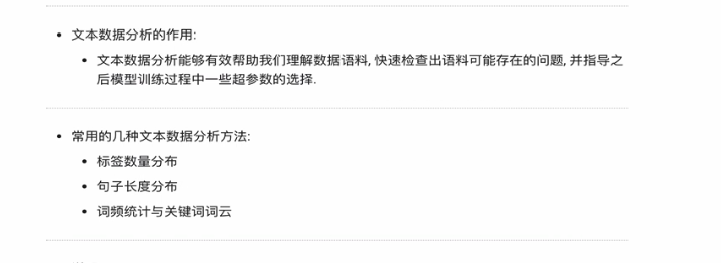

### The distribution of Labels

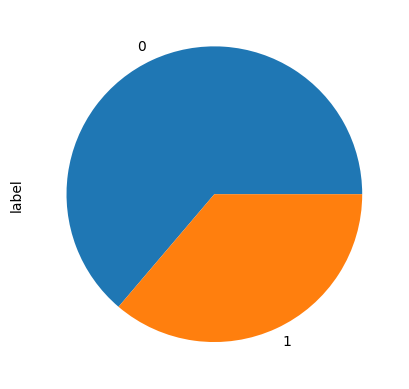

In [679]:
piechart = df_merged['label'].value_counts().plot(kind='pie')
fig1 = piechart.get_figure()
fig1.savefig("label.png");

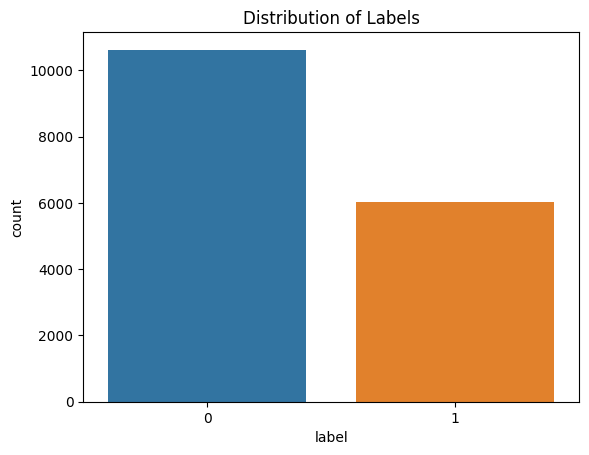

In [655]:
import seaborn as sns
# Check the distribution of labels
sns.countplot(x='label', data=df_merged)
plt.title('Distribution of Labels')
plt.show()

### the distribution of sentence length

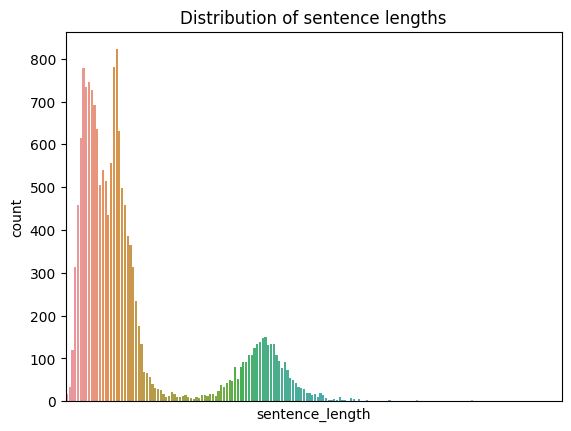

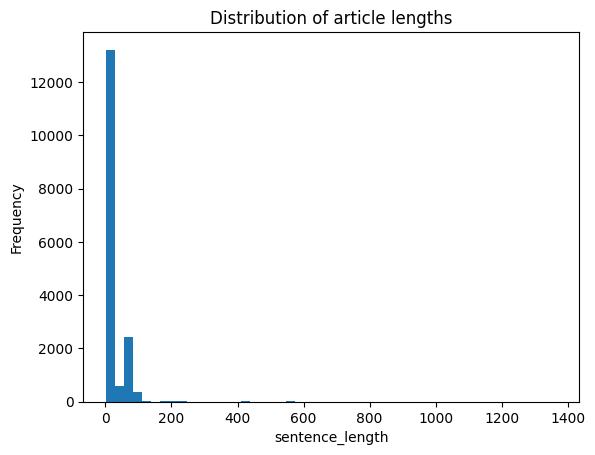

In [656]:
df_merged['sentence_length'] = df_merged['content'].apply(lambda x: len(x.split()))


sns.countplot(x="sentence_length", data=df_merged)
plt.xticks([])
plt.title('Distribution of sentence lengths')
plt.show()


plt.hist(df_merged['sentence_length'], bins=50)
plt.xlabel('sentence_length')
plt.ylabel('Frequency')
plt.title('Distribution of article lengths')
plt.show()


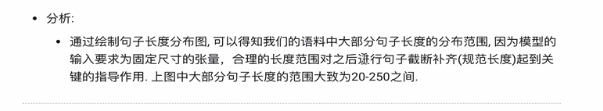

### Setiment Analysit 

In [657]:
# pip install textblob

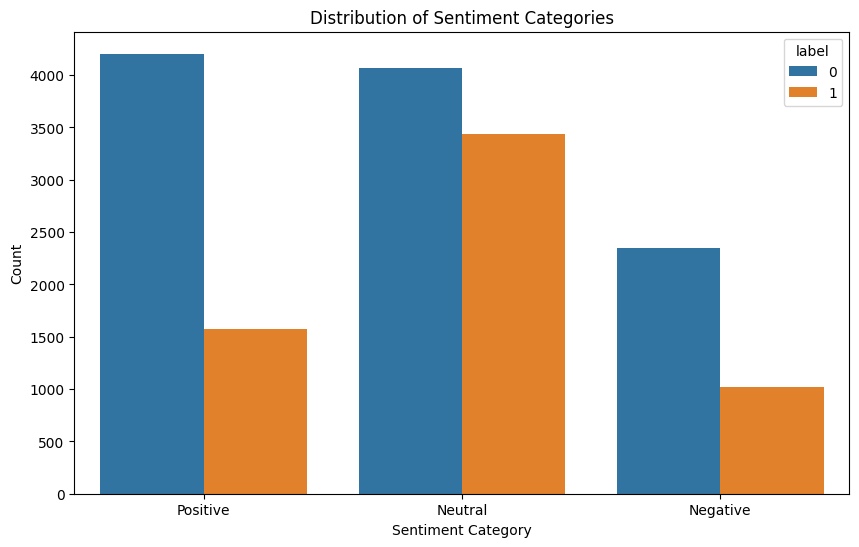

sentiment_category,Negative,Neutral,Positive
Fake,2350,4067,4205
Real,1016,3441,1576


In [658]:
# Get sentiment scores
sentiments = []
for article in df_merged['content']:
    blob = TextBlob(article)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Add sentiment scores to dataframe
df_merged['sentiment'] = sentiments

# Define function to map sentiment scores to categories
def get_sentiment_category(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Map sentiment scores to categories
df_merged['sentiment_category'] = df_merged['sentiment'].apply(get_sentiment_category)

# Distribution of sentiment categories by label
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', hue='label', data=df_merged)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Count sentiment categories by label
temp = df_merged.groupby(['label', 'sentiment_category']).count()['content'].reset_index()
temp = temp.pivot(index='label', columns='sentiment_category', values='content')
temp = temp[['Negative', 'Neutral', 'Positive']]
temp.index = ['Fake', 'Real']
temp.style.background_gradient(cmap='Purples')


### Word Cloud

In [659]:
def get_word_cloud(words):
    mostcommon = FreqDist(words).most_common(100)
    wordcloud = WordCloud(width=1600, height=800, background_color='white', stopwords=STOPWORDS).generate(str(mostcommon))
    fig = plt.figure(figsize=(30,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [660]:
# words =list( df_merged['content'].values)

fake_data=df_merged[df_merged['label']==1]["content"]
true_data=df_merged[df_merged['label']==0]["content"]

#### True news words cloud

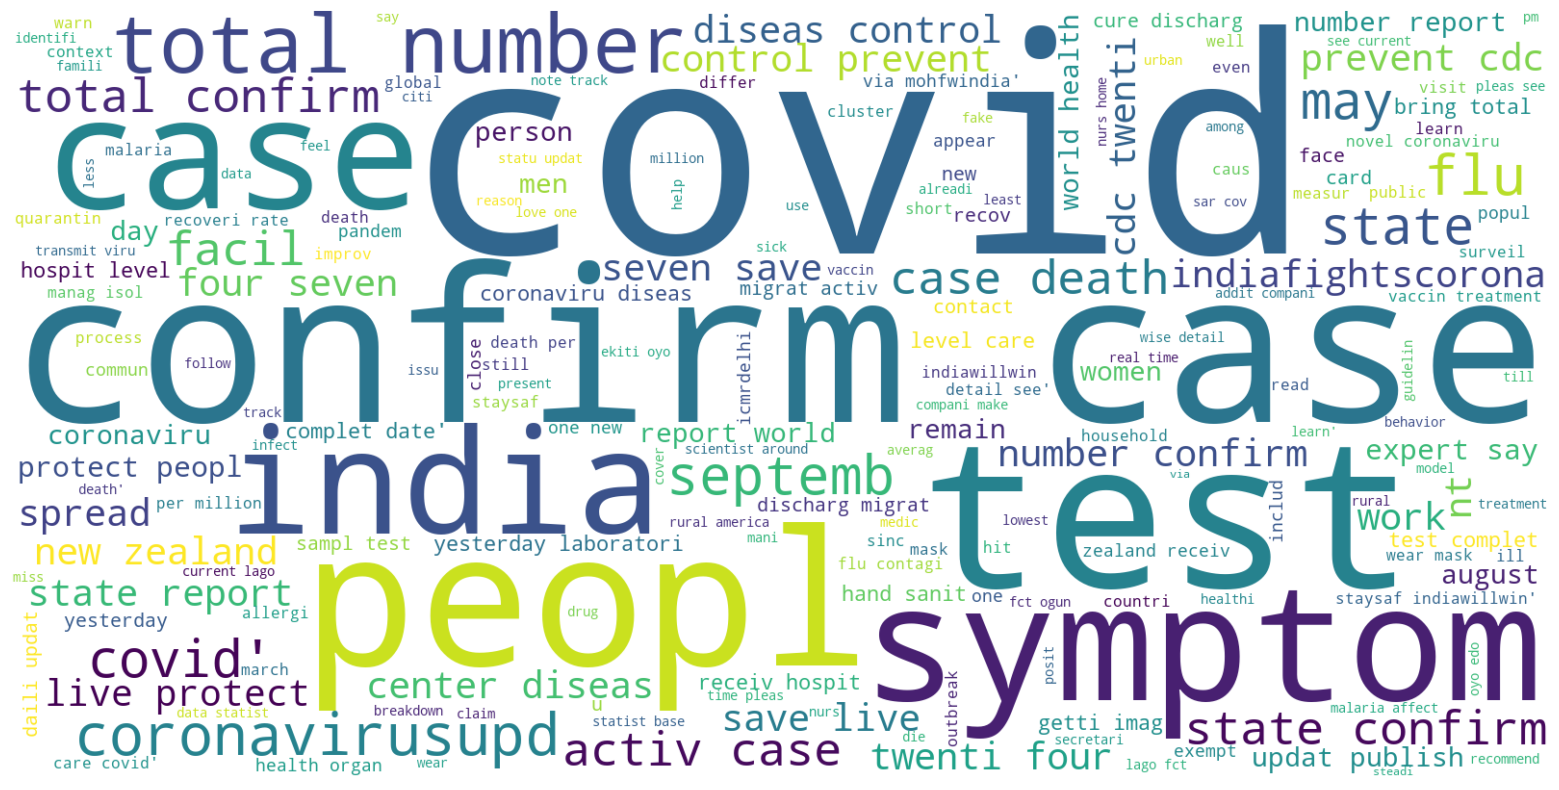

In [661]:
get_word_cloud(true_data)

#### Fake news words cloud

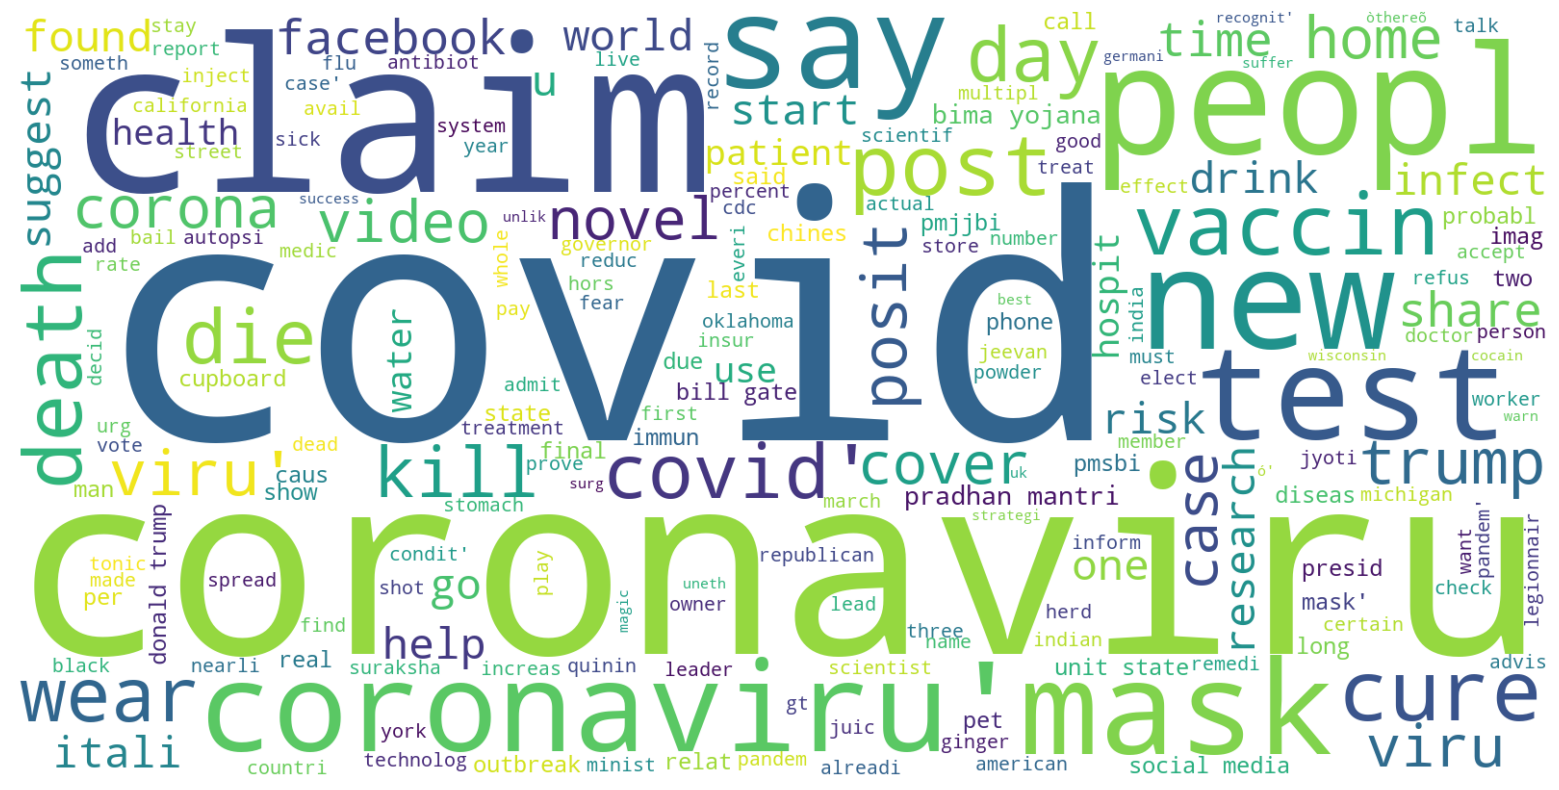

In [662]:
get_word_cloud(fake_data)

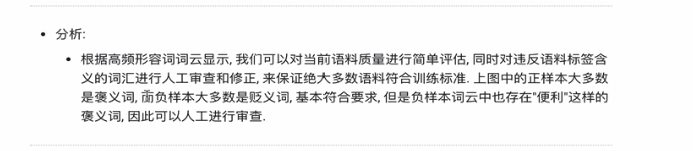

In [663]:
# import pandas as pd
# import re
# from sklearn.feature_extraction.text import CountVectorizer
# from scipy.sparse import hstack
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from nltk.stem.snowball import SnowballStemmer
# from nltk.corpus import stopwords



# Compute sentiment scores for each row of text
# sia = SentimentIntensityAnalyzer()
# df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert the text data to a sparse matrix
# vectorizer = CountVectorizer()
# x_text = vectorizer.fit_transform(df['text'])

# Add the URL and domain as additional features
# x_url = pd.get_dummies(df['domain']).values
# x_combined = hstack((x_text, x_url))

# Add the sentiment score as an additional feature
# x_sentiment = df['sentiment'].values.reshape(-1, 1)
# x_combined = hstack((x_combined, x_sentiment))

# Train a machine learning model on the combined sparse matrix
# ...


In [664]:
# 划分训练集和测试集
x=df_merged["content"]
y=df_merged["label"]
# x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25, random_state=2)

## Feature extraction

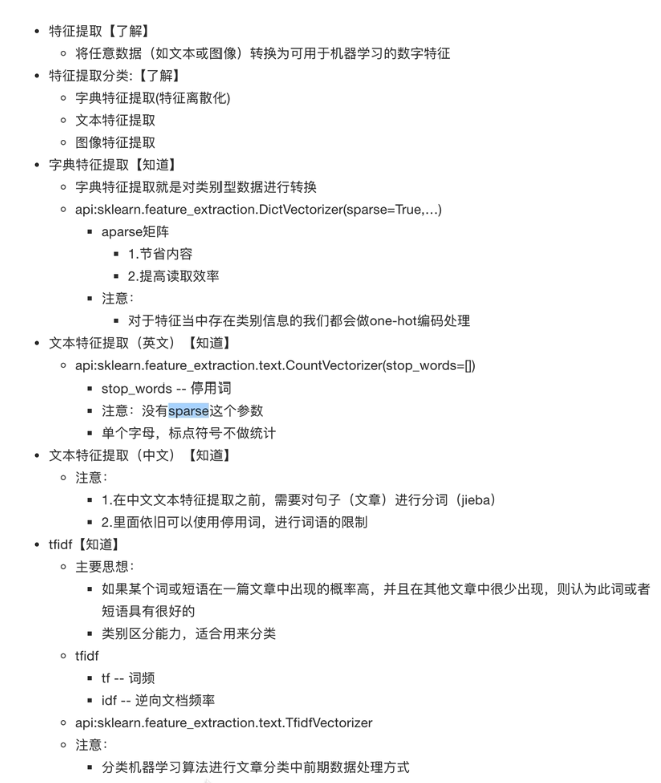

### TF-IDF

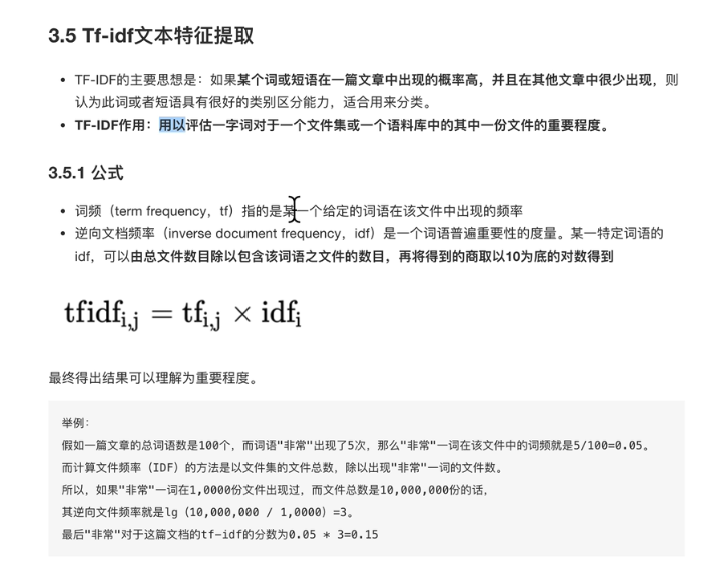

In [559]:
x1 = x.copy()
x2 = x.copy()
x3 = x.copy()
x4 = x.copy()
x5 = x.copy()

In [560]:
vectorization = TfidfVectorizer()
vectorization1 = TfidfVectorizer(ngram_range=(1,1))
vectorization2 = TfidfVectorizer(ngram_range=(1,2))
vectorization3 = TfidfVectorizer(ngram_range=(1,3))
vectorization4 = TfidfVectorizer(ngram_range=(1,4))

In [561]:
x=vectorization.fit_transform(x)
x1=vectorization1.fit_transform(x1)
x2=vectorization2.fit_transform(x2)
x3=vectorization3.fit_transform(x3)
x4=vectorization4.fit_transform(x4)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizations = [
    TfidfVectorizer(),
    TfidfVectorizer(ngram_range=(1, 1)),
    TfidfVectorizer(ngram_range=(1, 2)),
    TfidfVectorizer(ngram_range=(1, 3)),
    TfidfVectorizer(ngram_range=(1, 4))
]

x_data = [vectorization.fit_transform(x) for vectorization in vectorizations]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Example text data
texts = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(texts)
tfidf_vocab = tfidf_vectorizer.get_feature_names()

# Count vectorization
count_vectorizer = CountVectorizer()
count_features = count_vectorizer.fit_transform(texts)
count_vocab = count_vectorizer.get_feature_names()

# Print TF-IDF features and vocabulary
print("TF-IDF Features:")
print(tfidf_features.toarray())
print("TF-IDF Vocabulary:")
print(tfidf_vocab)

# Print Count features and vocabulary
print("Count Features:")
print(count_features.toarray())
print("Count Vocabulary:")
print(count_vocab)


### Word Embeddings

In [587]:
# pip install keras_preprocessing

In [665]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [666]:
WE=df_merged["content"]

In [667]:
# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(WE)
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

16408

In [668]:
sequences = tokenizer.texts_to_sequences(WE)
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

In [669]:
# create embedding index
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [594]:
print(embedding_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [670]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [671]:
embedding_matrix[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [672]:
padded_seq[1]

array([ 521,   19,  315, 1168,  108,  282,   11,   49,    7,   53,   34,
         11,   44,    7,   42,   21,   15,   35,   43,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [39]:

# add more extra features to improve accuracy
# Load the dataset
# df = pd.read_csv('fake_news_dataset.csv')

# Extract the domain and path from the URLs
# df['domain'] = df['url'].apply(lambda x: re.findall(r'^https?://([^/]+)', x)[0])
# df['path'] = df['url'].apply(lambda x: re.findall(r'^https?://[^/]+(/.+)$', x)[0])

# Convert the text data to a sparse matrix
# vectorizer = CountVectorizer(stop_words='english')
# x_text = vectorizer.fit_transform(df['text'])

# Create a sparse matrix for the domain and path features
# vectorizer = CountVectorizer()
# x_domain = vectorizer.fit_transform(df['domain'])
# x_path = vectorizer.fit_transform(df['path'])

# Add the sentiment score as an additional feature
# x_sentiment = df['sentiment'].values.reshape(-1, 1)

# Combine the sparse matrices
# x_combined = hstack((x_text, x_domain, x_path, x_sentiment))
# Train a machine learning model on the combined sparse matrix

### train test split

In [562]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=2)

In [563]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x1,y,test_size=.20, random_state=2)

In [564]:
x2_train, x2_test, y2_train, y2_test=train_test_split(x2,y,test_size=.20, random_state=2)

In [565]:
x3_train, x3_test, y3_train, y3_test=train_test_split(x3,y,test_size=.20, random_state=2)

In [566]:
x4_train, x4_test, y4_train, y4_test=train_test_split(x4,y,test_size=.20, random_state=2)

In [673]:
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(padded_seq, y, test_size=0.20, random_state=42, stratify=y)

### Dealing with Imbalanced Data

some techniques you could use:

Undersampling the majority class: This involves reducing the number of examples in the majority class to match the number of examples in the minority class. However, this may result in loss of information from the majority class.

Oversampling the minority class: This involves increasing the number of examples in the minority class to match the number of examples in the majority class. This can be done using techniques such as duplication, bootstrapping, and SMOTE.

Cost-sensitive learning: This involves assigning different costs to misclassification errors on the minority and majority classes during training.

Ensemble methods: This involves combining multiple models trained on different subsets of the data to create a more robust classifier.

Anomaly detection: This involves detecting the rare class (in this case, the fake news) as an anomaly rather than as a separate class.

In [567]:
from imblearn.over_sampling import SMOTE
# Create SMOTE object
smote = SMOTE(sampling_strategy='minority', random_state=27)

# Oversample the minority class
x_train, y_train= smote.fit_resample(x_train, y_train)
x_train1, y_train1= smote.fit_resample(x1_train, y1_train)
x_train2, y_train2= smote.fit_resample(x2_train, y2_train)
x_train3, y_train3= smote.fit_resample(x3_train, y3_train)
x_train4, y_train4= smote.fit_resample(x4_train, y4_train)

In [431]:
xv_train_dense = x_train.toarray()
xv_test_dense = x_test.toarray()
# y_train_dense=y_train.toarray()

## Build machine learning modules

#### 1. Logistic Regression

In [568]:
from sklearn.linear_model import LogisticRegression

In [569]:
LR = LogisticRegression(random_state=42)
LR1 = LogisticRegression(random_state=42)
LR2 = LogisticRegression(random_state=42)
LR3 = LogisticRegression(random_state=42)
LR4 = LogisticRegression(random_state=42)

In [570]:
LR.fit(x_train,y_train)
LR1.fit(x1_train,y1_train)
LR2.fit(x2_train,y2_train)
LR3.fit(x3_train,y3_train)
LR4.fit(x4_train,y4_train)

LogisticRegression(random_state=42)

In [571]:
y_pred_LR=LR.predict(x_test)
y1_pred_LR=LR1.predict(x1_test)
y2_pred_LR=LR2.predict(x2_test)
y3_pred_LR=LR3.predict(x3_test)
y4_pred_LR=LR4.predict(x4_test)

In [439]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2144
           1       0.87      0.93      0.90      1187

    accuracy                           0.93      3331
   macro avg       0.91      0.93      0.92      3331
weighted avg       0.93      0.93      0.93      3331



In [573]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test data
lr_acc = accuracy_score(y_test, y_pred_LR)
precision = precision_score(y_test, y_pred_LR)
recall = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)

print("Accuracy:", lr_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9204443110177124
Precision: 0.8652809853733642
Recall: 0.9258649093904449
F1 Score: 0.8945483485873459


In [572]:
accuracy = LR.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
accuracy1 = LR1.score(x1_test, y1_test)
print(f"Accuracy: {accuracy1}")
accuracy2 = LR2.score(x2_test, y2_test)
print(f"Accuracy: {accuracy2}")
accuracy3 = LR3.score(x3_test, y3_test)
print(f"Accuracy: {accuracy3}")
accuracy4 = LR4.score(x4_test, y4_test)
print(f"Accuracy: {accuracy4}")

Accuracy: 0.9204443110177124
Accuracy: 0.9156409486640649
Accuracy: 0.9156409486640649
Accuracy: 0.9120384268988292
Accuracy: 0.9078354848393876


### 2. Decision Tree Classification

In [322]:
from sklearn.tree import DecisionTreeClassifier

In [323]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [324]:
y_pred_dt = DT.predict(x_test)

In [325]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2649
           1       0.79      0.83      0.81      1520

    accuracy                           0.86      4169
   macro avg       0.85      0.85      0.85      4169
weighted avg       0.86      0.86      0.86      4169



In [326]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test data
dt_acc = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print("Accuracy:", dt_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8584792516190933
Precision: 0.7939317319848294
Recall: 0.8263157894736842
F1 Score: 0.8098001289490651


### 3. Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [199]:
y_pred_rfc = RFC.predict(x_test)

In [200]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1404
           1       0.91      0.93      0.92      1266

    accuracy                           0.92      2670
   macro avg       0.92      0.92      0.92      2670
weighted avg       0.92      0.92      0.92      2670



In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test data
rfc_acc = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)

print("Accuracy:", rfc_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9228464419475655
Precision: 0.9095826893353941
Recall: 0.9296998420221169
F1 Score: 0.91953125


### 4. Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [59]:
y_pred_gbc = GBC.predict(x_test)

In [60]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1404
           1       0.84      0.91      0.88      1266

    accuracy                           0.88      2670
   macro avg       0.88      0.88      0.88      2670
weighted avg       0.88      0.88      0.88      2670



In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test data
gbc_acc = accuracy_score(y_test, y_pred_gbc)
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)
f1 = f1_score(y_test, y_pred_gbc)

print("Accuracy:", gbc_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8786516853932584
Precision: 0.8442982456140351
Recall: 0.9123222748815166
F1 Score: 0.8769931662870158


### 5. Naive Bayer

In [ ]:
There are three main types of Naive Bayes models:

Gaussian Naive Bayes: assumes that the input features are normally distributed.
    
Multinomial Naive Bayes: used for discrete data such as text classification, where the input features represent the frequency of occurrence of words in a document.
    
Bernoulli Naive Bayes: similar to Multinomial Naive Bayes, but assumes that the input features are binary (e.g., present or absent).

In [707]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [62]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [708]:
nb.fit(xv_train_dense,y_train)
y_pred_nb=nb.predict(xv_test_dense)

ValueError: Found input variables with inconsistent numbers of samples: [16956, 17010]

In [64]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1404
           1       0.89      0.69      0.78      1266

    accuracy                           0.81      2670
   macro avg       0.83      0.81      0.81      2670
weighted avg       0.83      0.81      0.81      2670



In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test data
nb_acc = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print("Accuracy:", nb_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8134831460674158
Precision: 0.8934426229508197
Recall: 0.688783570300158
F1 Score: 0.7778768956289028


### 6. K Neighbors Classifier

In [683]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xv_train_dense, y_train)
y_pred_knn = knn.predict(xv_test_dense)


ValueError: Found input variables with inconsistent numbers of samples: [16956, 17010]

In [67]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1404
           1       0.91      0.89      0.90      1266

    accuracy                           0.90      2670
   macro avg       0.91      0.90      0.90      2670
weighted avg       0.90      0.90      0.90      2670



In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test data
knn_acc = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("Accuracy:", knn_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9048689138576779
Precision: 0.9087237479806138
Recall: 0.8886255924170616
F1 Score: 0.8985623003194888


### Support Vector Machine
Support vector machine is a classifier that represents the training data as points in space separated into categories by a gap as wide as possible. New points are then added to space by predicting which category they fall into and which space they will belong to.

In [202]:
from sklearn import svm

svm = svm.SVC(kernel='linear',probability=True)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [203]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1404
           1       0.93      0.96      0.94      1266

    accuracy                           0.94      2670
   macro avg       0.94      0.94      0.94      2670
weighted avg       0.94      0.94      0.94      2670



In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test data
svm_acc = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("Accuracy:", svm_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9441947565543071
Precision: 0.9279693486590038
Recall: 0.9565560821484992
F1 Score: 0.9420458965383119


In [ ]:

svm = svm.SVC(kernel='linear',probability=True)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [ ]:
print("Predicting people's names on the test set")

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

In [72]:
accuracies= {"LR": lr_acc, 
             "naive": nb_acc, 
             "kNN": knn_acc, 
             "DT": dt_acc, 
             "RF": rfc_acc,
             "SVM": svm_acc,
             "GBC":gbc_acc
             }

print("Classification models in descending order of accuracy:")
sorted(accuracies.items(), key=lambda x: x[1],reverse=True)

Classification models in descending order of accuracy:


[('SVM', 0.9441947565543071),
 ('LR', 0.9382022471910112),
 ('RF', 0.9228464419475655),
 ('kNN', 0.9048689138576779),
 ('GBC', 0.8786516853932584),
 ('DT', 0.8651685393258427),
 ('naive', 0.8134831460674158)]

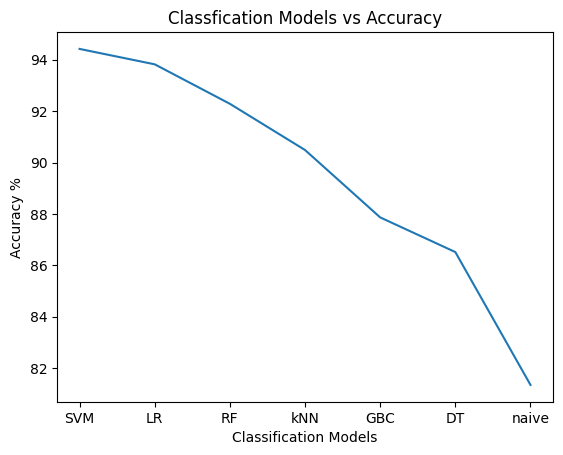

In [606]:

lists = sorted(accuracies.items(), key=lambda x: x[1]*100,reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

z = []
for i in y:
   z.append(i*100)
tuple(z)
plt.plot(x, z)

plt.title('Classfication Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy %')
plt.show()

## Deep Learning model

In [674]:
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

In [675]:
model = Sequential([
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

In [676]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1640900   
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,791,429
Trainable params: 150,529
Non-

In [677]:
# train the model
history = model.fit(x_train_d, y_train_d, epochs=10, batch_size=256, validation_data=(x_test_d, y_test_d))

Epoch 1/10
53/53 [==============================] - 128s 2s/step - loss: 0.6587 - accuracy: 0.6378 - val_loss: 0.6543 - val_accuracy: 0.6376
Epoch 2/10
53/53 [==============================] - 126s 2s/step - loss: 0.6547 - accuracy: 0.6378 - val_loss: 0.6543 - val_accuracy: 0.6376
Epoch 3/10
53/53 [==============================] - 131s 2s/step - loss: 0.6548 - accuracy: 0.6379 - val_loss: 0.6540 - val_accuracy: 0.6376
Epoch 4/10
53/53 [==============================] - 138s 3s/step - loss: 0.6547 - accuracy: 0.6379 - val_loss: 0.6544 - val_accuracy: 0.6376
Epoch 5/10
53/53 [==============================] - 137s 3s/step - loss: 0.6546 - accuracy: 0.6379 - val_loss: 0.6539 - val_accuracy: 0.6376
Epoch 6/10
53/53 [==============================] - 139s 3s/step - loss: 0.6543 - accuracy: 0.6379 - val_loss: 0.6538 - val_accuracy: 0.6376
Epoch 7/10
53/53 [==============================] - 139s 3s/step - loss: 0.6542 - accuracy: 0.6379 - val_loss: 0.6539 - val_accuracy: 0.6376
Epoch 8/10
53

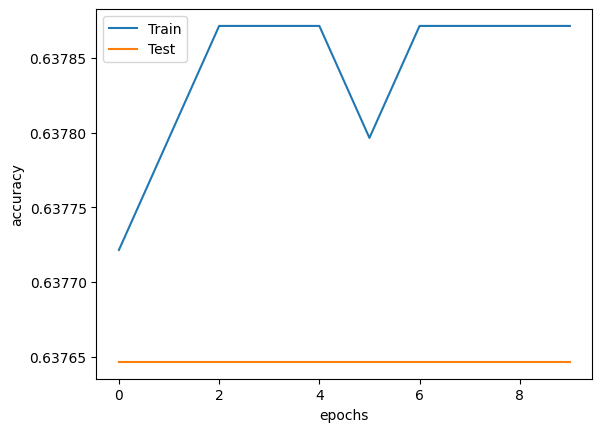

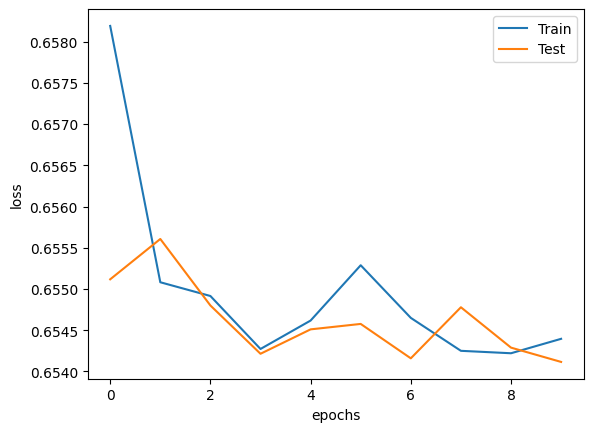

In [607]:
# visualize the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

## Optimizing the model.

### SVM Model Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
print("Fitting the classifier to the training set")

param_grid = { 
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,cv=5,n_jobs=-1, verbose=2)
clf = grid_search.fit(x_train, y_train)


# Extracting the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predicting on the testing set with the best model
y_pred = best_model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Fitting the classifier to the training set
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Accuracy: 0.9483146067415731


In [84]:
print('SVM base model accuracy:', svm_acc)
print('SVM tuning model accuracy:', accuracy)

SVM base model accuracy: 0.9441947565543071
SVM tuning model accuracy: 0.9483146067415731


### RF model Tuning

In [88]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [10,50, 100, 200],
    'max_depth': [5, 10, 15,20],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(RFC, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
rf_tuning_accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}
Best Score: 0.8756554307116104


In [89]:
print("RF base model Accuracy:", rfc_acc)
print("RF tuning model Accuracy:", rf_tuning_accuracy)

RF base model Accuracy: 0.9228464419475655
RF tuning model Accuracy: 0.9483146067415731


### KNN model

In [688]:
KNN=KNeighborsClassifier()

param_grid={"n_neighbors":[1,3,5,7]}


KNN=GridSearchCV(KNN,param_grid=param_grid,cv=5)

KNN.fit(x_train,y_train)

y_pred=KNN.predict(x_test)

KNN_tuning_accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", KNN.best_params_)
print("Best Score:", KNN.best_score_)

Best Parameters: {'n_neighbors': 1}
Best Score: 0.8608465608465607


In [690]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_grid = {'n_neighbors': [1,3,5, 7,9], 'weights': ['uniform', 'distance']}

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the values of cv to be tested
cv_values = [3, 5, 10]

# Loop over the different values of cv
for cv in cv_values:

    # Define the GridSearchCV object
    knn_cv = GridSearchCV(knn, param_grid=param_grid, cv=cv)

    # Fit the model on the training data
    knn_cv.fit(x_train, y_train)

    # Predict the labels of the test data
    y_pred = knn_cv.predict(x_test)

    # Compute the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print('cv = {}: accuracy = {:.3f}'.format(cv, accuracy))


cv = 3: accuracy = 0.830
cv = 5: accuracy = 0.830
cv = 10: accuracy = 0.830


In [689]:
print("KNN base model Accuracy:", knn_acc)
print("KNN tuning model Accuracy:", KNN_tuning_accuracy)

KNN base model Accuracy: 0.9048689138576779
KNN tuning model Accuracy: 0.8303812668868208


## Ensemble learning

Ensemble learning is a machine learning technique where multiple models are combined to improve overall prediction accuracy. The idea is to build a set of diverse models and then combine their predictions using some technique such as averaging, voting, or stacking. The intuition behind ensemble learning is that the models will make different errors and by combining their predictions, the overall error rate can be reduced.

Ensemble learning can be used with various types of models, including decision trees, neural networks, and support vector machines. Some popular ensemble learning techniques include bagging, boosting, and random forests. Bagging (bootstrap aggregating) involves building multiple models on bootstrapped samples of the training data, while boosting involves iteratively training models on the hardest examples in the training data. Random forests combine multiple decision trees to improve prediction accuracy.

Ensemble learning can be a powerful tool for improving the performance of machine learning models and is used in a wide range of applications, including classification, regression, and anomaly detection.

### Soft Voting

In [119]:
voting_clf = VotingClassifier(estimators=[('svm', svm)], voting='soft')

In [103]:
voting_clf = VotingClassifier(estimators=[('rf', RFC), ('dt', DT), ('lr', LR),('GBC',GBC),('NB',nb),('KNN',knn)], voting='soft')

# voting_clf = VotingClassifier(estimators=[('lr', LR),('svm', svm)], voting='soft')

In [ ]:
voting_clf.fit(xv_train_dense, y_train)
y_pred_vc = voting_clf.predict(xv_test_dense)

In [106]:
print("Accuracy:", voting_clf.score(xv_test_dense, y_test))

Accuracy: 0.9314606741573034


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test data
vc_acc = accuracy_score(y_test, y_pred_vc)
precision = precision_score(y_test, y_pred_vc)
recall = recall_score(y_test, y_pred_vc)
f1 = f1_score(y_test, y_pred_vc)

print("Accuracy:", vc_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9314606741573034
Precision: 0.9250398724082934
Recall: 0.9287429943955164
F1 Score: 0.926887734718338


### Random Forests Model tuning

### Boosting

# Saving the trained model

In [ ]:
import pickle

In [ ]:
pickle.dump(LR, open("model/trained_model_LR.sav",'wb'))
pickle.dump(DT, open("model/trained_model_DT.sav",'wb'))
pickle.dump(RFC, open("model/trained_model_RFC.sav",'wb'))
pickle.dump(GBC, open("model/trained_model_GBC.sav",'wb'))
pickle.dump(svm, open("model/trained_model_SVM.sav",'wb'))
pickle.dump(voting_clf, open("model/trained_model_voting.sav",'wb'))
pickle.dump(vectorization, open("model/vectorization.pickle", "wb"))

### Loading the saved model

In [443]:
loaded_model_LR=pickle.load(open("model/trained_model_LR.sav",'rb'))
loaded_model_DT=pickle.load(open("model/trained_model_DT.sav",'rb'))
loaded_model_RFC=pickle.load(open("model/trained_model_RFC.sav",'rb'))
loaded_model_GBC=pickle.load(open("model/trained_model_GBC.sav",'rb'))
loaded_model_svm=pickle.load(open("model/trained_model_SVM.sav",'rb'))
loaded_model_voting=pickle.load(open("model/trained_model_voting.sav",'rb'))
loaded_vectorization = pickle.load(open("model/vectorization.pickle", "rb"))

In [ ]:
# models = {'RFC': RFC, 'DT': DT, 'LR': LR, 'GBC': GBC, 'NB': nb, 'KNN': knn, 'SVM': svm, 'voting': voting_clf}
# pickle.dump(models, open('model/trained_models.pickle', 'wb'))
# pickle.dump(vectorization, open('model/vectorization.pickle', 'wb'))

In [ ]:
# import pickle

# Load the models and vectorizer
# models = pickle.load(open('model/trained_models.pickle', 'rb'))
# vectorization = pickle.load(open('model/vectorization.pickle', 'rb'))

# Use the models and vectorizer
# RFC = models['RFC']
# DT = models['DT']
# LR = models['LR']
# GBC = models['GBC']
# nb = models['NB']
# knn = models['KNN']
# svm = models['SVM']
# voting_clf = models['voting']


# Model Testing With Manual Entry


In [441]:
def output_lable(n):
    if n == 1:
        return "Fake News"
    elif n == 0:
        return "Real News"

def manual_testing_voting(news):
    testing_news = {"content":[news]}
    new_def_test = pd.DataFrame(testing_news)
    
    new_def_test["content"]=new_def_test["content"].apply(preprocess_text)
   # new_def_test["content"]=new_def_test["content"].apply(stem_and_filter)
    
    new_x_test = new_def_test["content"]
    new_xv_test = loaded_vectorization.transform(new_x_test)
    new_xv_test = new_xv_test.toarray()


    
    # 对新闻进行预测
    pred_voting = loaded_model_voting.predict(new_xv_test)
    pred_LR = loaded_model_LR.predict(new_xv_test)
    pred_DT = loaded_model_DT.predict(new_xv_test)
    pred_RFC = loaded_model_RFC.predict(new_xv_test)
    pred_GBC = loaded_model_GBC.predict(new_xv_test)

    # 输出各分类器的预测结果
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nGBC Prediction: {}\nVoting Prediction: {} ".format(
        output_lable(pred_LR[0]), output_lable(pred_DT[0]), output_lable(pred_RFC[0]),output_lable(pred_GBC[0]),output_lable(pred_voting[0])))


In [444]:
news = str(input())
manual_testing_voting(news)

COVID-19 is just like the flu


LR Prediction: Fake News 
DT Prediction: Fake News 
RFC Prediction: Fake News 
GBC Prediction: Fake News
Voting Prediction: Fake News 
